# 1. Intro to the Data Set
In this project, I will practice the machine learning workflow learned on DataQuest to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set here and can download it directly from here. https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [141]:
#import the data
import pandas as pd
pd.options.display.max_columns = 99 #only display 99 (we have over 200 in data set)

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data',names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [142]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# 2. Data Cleaning
We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also normalize the values in all numeric columns.

In [143]:
import numpy as np
#replace '?' with np.nan
numeric_cars=numeric_cars.replace('?',np.nan) 
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [144]:
# all columns should be numeric. But we see object types. 
# convert all values columns to numeric
# then check for empty rows

numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [145]:
# because the price column is what we want to predict, lets remove those empty rows
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [146]:
# replace remaining missing columns with COLUMN means. Confirm there are no nan left
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [147]:
# normalize all columns to range from 0 to 1, except the target column.
# this is important for K-Nearest, as features with inherently larger scales...
# ... can have a greater impact on the Euclidiean formula if NOT normalized.
# I'M PRETTY SURE THIS IS NECESSARY FOR K-NEAREST NEIGHBOR ALGOs

price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max()-numeric_cars)/(numeric_cars.max())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,13495.0
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,16500.0
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,16500.0
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,13950.0
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,17450.0


# 3. Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [148]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4007.472352
curb-weight          4437.934395
highway-mpg          4579.037250
width                4644.898429
city-mpg             4729.673421
length               5382.671155
wheel-base           5527.682489
compression-rate     6736.676353
bore                 6816.853712
height               7487.652519
peak-rpm             7498.746475
normalized-losses    7635.170416
stroke               8078.491289
dtype: float64

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df,k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

train_cols = numeric_cars.columns.drop('price')
k_rmse_results = {}

k_vals = [1,3,5,7,9]

for col in train_cols:
    col_dict = {}
    for x in k_vals:
        rmse_val = knn_train_test(col, 'price', numeric_cars,x)
        col_dict[x] = rmse_val
    k_rmse_results[col] = col_dict

k_rmse_results

{'bore': {1: 7496.1492312406444,
  3: 6936.9888741632003,
  5: 6816.8537123691885,
  7: 7062.0613050538341,
  9: 6869.7274373649016},
 'city-mpg': {1: 4540.3610032247389,
  3: 4662.4683767438482,
  5: 4729.6734209992692,
  7: 5099.2742894698586,
  9: 4999.2917237740958},
 'compression-rate': {1: 9024.9026779536325,
  3: 7033.5529229950389,
  5: 6736.676353123451,
  7: 7459.1131944220724,
  9: 7219.385481303907},
 'curb-weight': {1: 5518.8832374058084,
  3: 5048.6077260366692,
  5: 4437.9343946355393,
  7: 4369.3490898512136,
  9: 4632.2055452210743},
 'height': {1: 9108.4718365936551,
  3: 8049.9871472883196,
  5: 7487.6525188849646,
  7: 7753.7974180840583,
  9: 7695.632426557866},
 'highway-mpg': {1: 5270.360471073066,
  3: 4618.1866223408379,
  5: 4579.0372499290315,
  7: 4914.2600028726101,
  9: 5181.9124189636359},
 'horsepower': {1: 3749.5962185254293,
  3: 3964.9503610053594,
  5: 4007.4723516831596,
  7: 4391.4816735297054,
  9: 4505.1886320053109},
 'length': {1: 5291.78516454

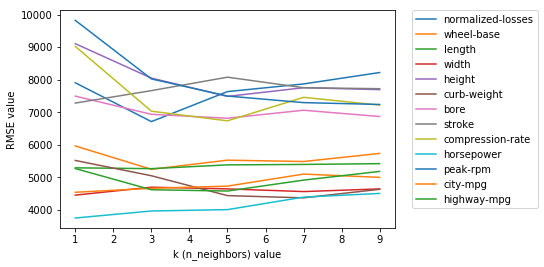

In [150]:
import matplotlib.pyplot as plt
all_labels = []
for k,sub_dicts in k_rmse_results.items():
    x = list(sub_dicts.keys())
    y = list(sub_dicts.values())
    
    plt.plot(x,y)
    plt.xlabel('k (n_neighbors) value')
    plt.ylabel('RMSE value')
    all_labels.append(k)

#include legend and put it right of plot
plt.legend(labels=all_labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4. Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [151]:
# which k performed best?
from collections import Counter
min_ks = []
for k, subdict in k_rmse_results.items():
    min_ks.append(min(subdict, key=subdict.get))
    
print(min_ks)
cnt = Counter(min_ks)
print(cnt.most_common(2))

[3, 3, 3, 1, 5, 7, 5, 1, 5, 1, 9, 1, 5]
[(1, 4), (5, 4)]


It appears that 1 and 4 are the 'k' vals that produce the lowest rmse vals. Let's go with 5 as 1 is probably not the best option...

In [152]:
# compute the average RMSE across different 'k' values for each feature.
# the features which result in univariate models with the lowest RMSE vals...
# should be the features you use in your multivariate model

avg_rmses = {}
for k,v in k_rmse_results.items():
    avg_rmses[k] = np.mean(list(v.values()))
    
avg_rmses = pd.Series(avg_rmses).sort_values()
avg_rmses

horsepower           4123.737847
width                4600.272698
curb-weight          4801.395999
city-mpg             4806.213763
highway-mpg          4912.751353
length               5351.716651
wheel-base           5591.790931
bore                 7036.356112
compression-rate     7494.726126
normalized-losses    7669.373476
stroke               7700.844238
peak-rpm             7977.094835
height               8019.108269
dtype: float64

In [153]:
# make dict of lists of 7 best feature options
num_of_features = [1,2,3,4,5,6,7]
dict_of_lists = {}
for i in num_of_features:
    dict_of_lists[i] = list(avg_rmses.index)[0:i]
dict_of_lists

{1: ['horsepower'],
 2: ['horsepower', 'width'],
 3: ['horsepower', 'width', 'curb-weight'],
 4: ['horsepower', 'width', 'curb-weight', 'city-mpg'],
 5: ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg'],
 6: ['horsepower',
  'width',
  'curb-weight',
  'city-mpg',
  'highway-mpg',
  'length'],
 7: ['horsepower',
  'width',
  'curb-weight',
  'city-mpg',
  'highway-mpg',
  'length',
  'wheel-base']}

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_cols])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

# use dict_of_lists created above to test model using 7 different sets of features

rmse_results_feats = {}

for k, features_list in dict_of_lists.items():
        rmse_val = knn_train_test(features_list, 'price', numeric_cars)
        rmse_results_feats['%d best features' % k] = rmse_val

rmse_results_feats

{'1 best features': 4007.4723516831596,
 '2 best features': 3681.3980922556266,
 '3 best features': 3212.5596306057919,
 '4 best features': 3232.1036292326721,
 '5 best features': 3346.6737097607775,
 '6 best features': 3398.1290113563641,
 '7 best features': 3379.8833077870345}

# 5. Hyperparameter Tuning
Let's now optimize the model that performed the best in the previous step.

In [176]:
# create subset of dictionary with best models (3,4,and 5 features)
best_models_dict = {k: dict_of_lists[k] for k in dict_of_lists.keys() & {3, 4, 5}}
best_models_dict

{3: ['horsepower', 'width', 'curb-weight'],
 4: ['horsepower', 'width', 'curb-weight', 'city-mpg'],
 5: ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']}

In [178]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cols, target_col, df,n_n):
    knn = KNeighborsRegressor(n_n)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_cols])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

# use best_models_dict created above to test model using 7 different sets of features

rmse_results_final = {}
n_n_list = list(range(1,25))
for k, features_list in best_models_dict.items():
        single_mod = {}
        for n in n_n_list:
            rmse_val = knn_train_test(features_list, 'price', numeric_cars,n)
            single_mod[n] = rmse_val
        rmse_results_final['%d best features' % k] = single_mod

rmse_results_final

{'3 best features': {1: 3308.7499419294022,
  2: 3044.812909435545,
  3: 3042.2117028741623,
  4: 2958.964739955848,
  5: 3212.5596306057919,
  6: 3542.3007736748041,
  7: 3801.5597829031262,
  8: 4007.7501484785639,
  9: 4074.3452185932656,
  10: 4225.0494506919176,
  11: 4338.8991649386644,
  12: 4428.0841388589351,
  13: 4496.3621365502913,
  14: 4540.1357252028592,
  15: 4614.0272979737174,
  16: 4654.474275823789,
  17: 4714.0580949648638,
  18: 4645.9886513064885,
  19: 4628.211244787356,
  20: 4665.0992005704829,
  21: 4648.5009310888045,
  22: 4610.0134050293573,
  23: 4642.8367354686252,
  24: 4669.5676777327653},
 '4 best features': {1: 3135.5489073677436,
  2: 2514.1812009849527,
  3: 2788.5519417420178,
  4: 2917.4679936225316,
  5: 3232.1036292326721,
  6: 3566.725419074407,
  7: 3834.9804809872821,
  8: 3927.3952487590609,
  9: 4078.9765839753827,
  10: 4199.8376270003955,
  11: 4345.0069904611819,
  12: 4451.3870113027624,
  13: 4550.1634683008278,
  14: 4591.53401604288

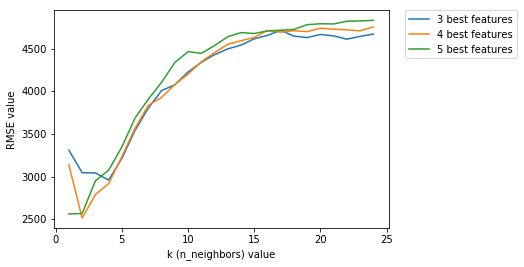

In [179]:
import matplotlib.pyplot as plt
all_labels = []
for k,sub_dicts in rmse_results_final.items():
    x = list(sub_dicts.keys())
    y = list(sub_dicts.values())
    
    plt.plot(x,y)
    plt.xlabel('k (n_neighbors) value')
    plt.ylabel('RMSE value')
    all_labels.append(k)

#include legend and put it right of plot
plt.legend(labels=all_labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 6. Next Steps
That's it for the guided steps. Here are some ideas for next steps:

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.